#Car Fuel Consumption
---
Dataset: [Car Fuel Consumption](https://www.kaggle.com/anderas/car-consume)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sb

In [2]:
# Зничтування даних
filepath = 'measurements.csv'
df=pd.read_csv(filepath)

In [3]:
# зміна типу даних в колонках
df['distance']=df['distance'].str.replace(',','.').astype(float)
df['consume']=df['consume'].str.replace(',','.').astype(float)
df['temp_inside']=df['temp_inside'].str.replace(',','.').astype(float)

df.head(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [4]:
# Створення описової статистики.
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


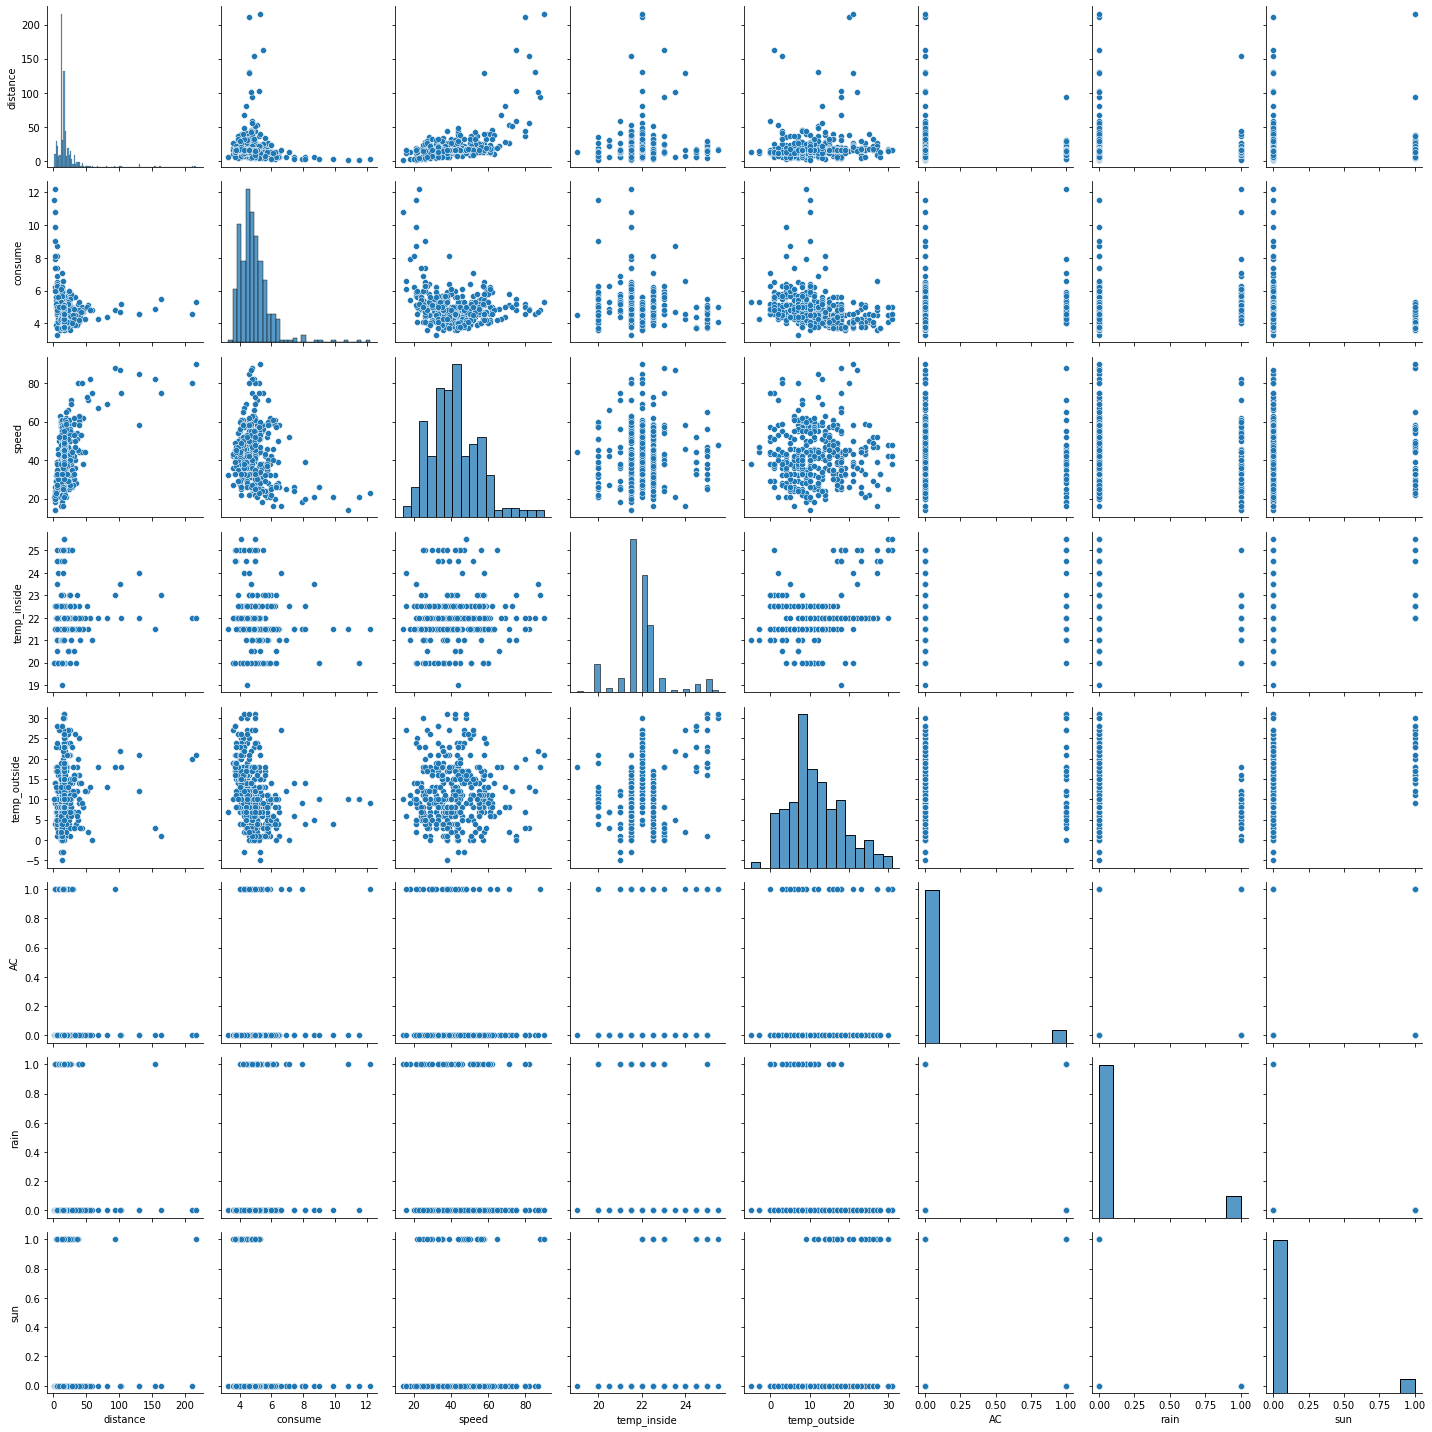

In [5]:
# побудва попарно зв’язки в набори даних і виведення графіків
columns = ['distance','consume', 'speed', 'temp_inside','temp_outside','AC', 'rain', 'sun']
sb.pairplot(df[columns]);
plt.tight_layout();
plt.show()

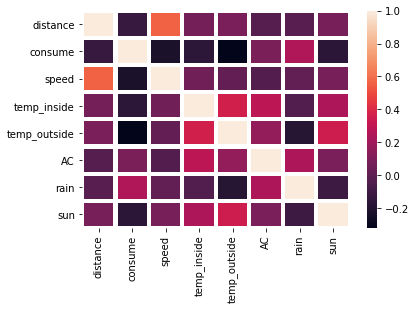

In [6]:
# Кореляція даних і побудова heatmap
cm = df[columns].corr()
hm = sb.heatmap(data =cm,cbar = True,annot = False,square = False,xticklabels =columns,yticklabels = columns,linewidths = 3.2)
plt.show()

In [7]:
corr_matrix = df.corr()
corr_matrix['consume'].sort_values(ascending = False)

consume         1.000000
rain            0.248118
AC              0.096591
distance       -0.128967
temp_inside    -0.161991
sun            -0.170667
speed          -0.227866
temp_outside   -0.320811
Name: consume, dtype: float64

In [8]:
print(df)
gas_type="E10" # or "SP98"

     distance  consume  speed  temp_inside  temp_outside specials gas_type  \
0        28.0      5.0     26         21.5            12      NaN      E10   
1        12.0      4.2     30         21.5            13      NaN      E10   
2        11.2      5.5     38         21.5            15      NaN      E10   
3        12.9      3.9     36         21.5            14      NaN      E10   
4        18.5      4.5     46         21.5            15      NaN      E10   
..        ...      ...    ...          ...           ...      ...      ...   
383      16.0      3.7     39         24.5            18      NaN     SP98   
384      16.1      4.3     38         25.0            31       AC     SP98   
385      16.0      3.8     45         25.0            19      NaN     SP98   
386      15.4      4.6     42         25.0            31       AC     SP98   
387      14.7      5.0     25         25.0            30       AC     SP98   

     AC  rain  sun refill liters refill gas  
0     0     0    

In [9]:
#фільтрація даних
df_filtered = df
df_filtered = df_filtered[df_filtered['gas_type']==gas_type]
df_filtered = df_filtered.drop(columns=['specials','refill liters','refill gas',"gas_type"])
df_filtered = df_filtered[~df_filtered.isin([np.nan, np.inf, -np.inf]).any(1)]

In [10]:
df_filtered

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...,...
344,16.1,5.1,30,25.0,16,1,1,0
345,16.0,4.0,42,22.0,15,0,0,0
346,15.4,4.8,40,22.0,18,0,0,0
347,17.2,3.9,35,22.0,16,0,0,0


In [11]:
df_filtered.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,21.095541,4.950955,43.566879,21.917197,10.031847,0.044586,0.101911,0.070064
std,20.495185,0.897976,14.154946,0.659854,6.379475,0.207053,0.303499,0.256071
min,1.700000,3.700000,14.000000,21.000000,-5.000000,0.000000,0.000000,0.000000
25%,12.000000,4.400000,35.000000,21.500000,6.000000,0.000000,0.000000,0.000000
50%,15.400000,4.800000,42.000000,21.500000,9.000000,0.000000,0.000000,0.000000
75%,21.100000,5.300000,51.000000,22.500000,14.000000,0.000000,0.000000,0.000000
max,130.300000,10.800000,88.000000,25.000000,27.000000,1.000000,1.000000,1.000000


In [12]:
X = df_filtered[['distance', 'speed', 'temp_inside','temp_outside','AC', 'rain', 'sun']]
y = df_filtered['consume']

In [13]:
# Розбиття даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [14]:
polinomial_degree = 2;
polynomial_features = PolynomialFeatures(degree=polinomial_degree,include_bias=False)
linear_regression = LinearRegression(normalize=True)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('linear_regression', LinearRegression(normalize=True))])

In [15]:
predicted = pipeline.predict(X_test)

In [16]:
print(f"average_absolute_error:{mean_absolute_error(y_test.values,predicted)}")
print(f"average_squared_error:{mean_squared_error(y_test.values,predicted)}")
print(f"root_mean_squared_error:{mean_squared_error(y_test.values,predicted,squared=False)}")

average_absolute_error:1.1978008966283622
average_squared_error:5.717519414437386
root_mean_squared_error:2.3911334999195226


In [17]:
delta = abs(y_test.values -predicted)

In [18]:
index = np.argmax(delta) 
max_val=np.max(delta)
print(f"(max_val,index):({max_val},{index})",)

(max_val,index):(11.671340385933444,47)


In [19]:
X_test.iloc[index]

distance        93.9
speed           88.0
temp_inside     23.0
temp_outside    18.0
AC               1.0
rain             0.0
sun              1.0
Name: 273, dtype: float64

In [20]:
print(f"predicted:{predicted[index]}")
print(f"from_dataset:{y_test.iloc[index]}")

predicted:16.471340385933445
from_dataset:4.8


In [21]:
def normalize(X):
    mean = np.mean(X,axis =0)
    std = np.std(X,axis =0)
    X_new = (X-mean)/std
    return X_new, mean, std

In [22]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [23]:
def hypothesis(X, theta):
    h_thetha = X.dot(theta);
    return h_thetha

In [24]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = sum((hypothesis(X,theta) - y)**2)/(2*m)
    return J

In [25]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_thetha =np.array(((hypothesis(X,theta)-y).dot(X))/m)
    return d_thetha

In [26]:
def gradient_descent(X, y, theta, alpha, max_num_iters,eps, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    current_iteration = 0;
    if print_J == True:
        print(J)
    J_history.append(J)
    while(True):
        delta =derivative(X, y, theta)*alpha;
        theta = theta - delta;
        J = cost_function(X, y, theta);
        if print_J == True:
            print(J);
        J_history.append(J)
        current_iteration+=1;
        if(abs(J_history[-1] - J_history[-2]) < eps or current_iteration >max_num_iters): 
            break;
    return theta, J_history

In [27]:
def Predict(X,mean,std,theta):
    X =(X-mean)/std;
    X = prepare_X(X)
    predicted =hypothesis(X,theta);
    return predicted

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [29]:
X_train_norm, mean, std = normalize(X_train)
X_train = prepare_X(X_train_norm)
theta = np.array([0,0,0,0,0,0,0,0])

In [30]:
print(f'X:{X_train.shape}')
print(f'y:{y_train.shape}')
print(cost_function(X_train, y_train, theta))

X:(94, 8)
y:(94,)
12.830851063829789


In [31]:
alpha = 0.005
max_num_iters = 1000
eps = 1e-16

In [32]:
new_theta, Js = gradient_descent(X_train, y_train, theta, alpha, max_num_iters,eps, False)
print(new_theta)

[ 4.93942006e+00 -4.86096611e-03 -2.69541499e-01  4.89556849e-02
 -1.54116004e-01 -1.60017856e-01  2.43565434e-01 -9.35319779e-02]


In [33]:
predicted = Predict(X_test,mean,std,new_theta)

[4.57410322 5.69547283 4.61230609 4.2172628  4.10110444 5.19324724
 4.21263788 5.29112055 3.9927324  3.2983386  5.09437649 5.2053534
 5.38836241 4.30948047 4.60013416 4.6905735  5.01698803 5.8077467
 4.91948704 5.11605208 4.19350987 5.00670563 4.55598043 5.16470502
 5.15871207 5.33014187 4.83518464 4.67081477 4.69279675 4.73777501
 4.47003848 4.73827818 4.99230317 4.8682534  5.2610627  5.37950607
 5.49253567 5.10245399 4.51406842 4.97595858 5.60507502 4.73285241
 5.11844312 4.75907472 5.15269369 5.02240663 5.23150285 2.53573447
 5.28620579 5.23896574 4.99858072 4.88376835 4.74789311 5.35996072
 4.88338368 5.14577435 4.32839029 4.68512404 4.62827505 4.96442023
 4.4635715  5.05273054 5.19570759]


In [34]:
print(f"average_absolute_error:{mean_absolute_error(y_test.values,predicted)}")
print(f"average_squared_error:{mean_squared_error(y_test.values,predicted)}")
print(f"root_mean_squared_error:{mean_squared_error(y_test.values,predicted,squared=False)}")

average_absolute_error:0.5748303385943645
average_squared_error:0.6540083343695292
root_mean_squared_error:0.8087078176755368
